In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, Column, Integer, String, Float
from sqlalchemy import inspect

In [10]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [17]:
#Automap our sqlite file
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [18]:
# Create references for our tables
measure = Base.classes.measurement
station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

2016-08-23


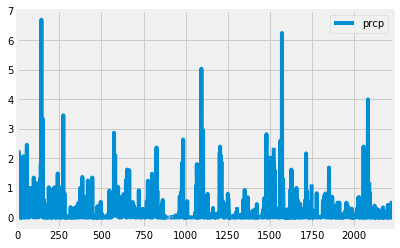

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

session = Session(bind=engine)
##for row in session.query(Measurement.date, Station).limit(5).all():
##    print(row)
session.query(measure.date).order_by(measure.date.desc()).first()
# Calculate the date 1 year ago from the last data point in the database
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year)
# Perform a query to retrieve the data and precipitation scores
data = session.query(measure.date, measure.prcp).\
    filter(measure.date >= one_year).\
    order_by(measure.date,).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data)
# Sort the dataframe by date
df.head()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000
